In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from pandas.plotting import scatter_matrix

Class Utils to load data and Create training and testing data

In [23]:
class Utils:
    df = pd.read_csv("E:/MIT/DATASETS/archive (11)/IRIS.csv")
    
    def __init__(self):
        print('Utils class to load data')


Basic EDA

In [24]:
u = Utils()


Utils class to load data


In [25]:
u.df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Converting the species values to numeric

In [26]:
u.df['species'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2],inplace=True)

In [27]:
u.df.head() #checking the first lines of data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
u.df.tail() #checking the last lines of data

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [29]:
u.df.shape #checking the dataframe size

(150, 5)

In [32]:
u.df.info() #Finding information about the attributes of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [61]:
u.df.describe() #getting the statistical measure

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [62]:
#to display no. of samples on each class
u.df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>],
       [<AxesSubplot:title={'center':'species'}>, <AxesSubplot:>]],
      dtype=object)

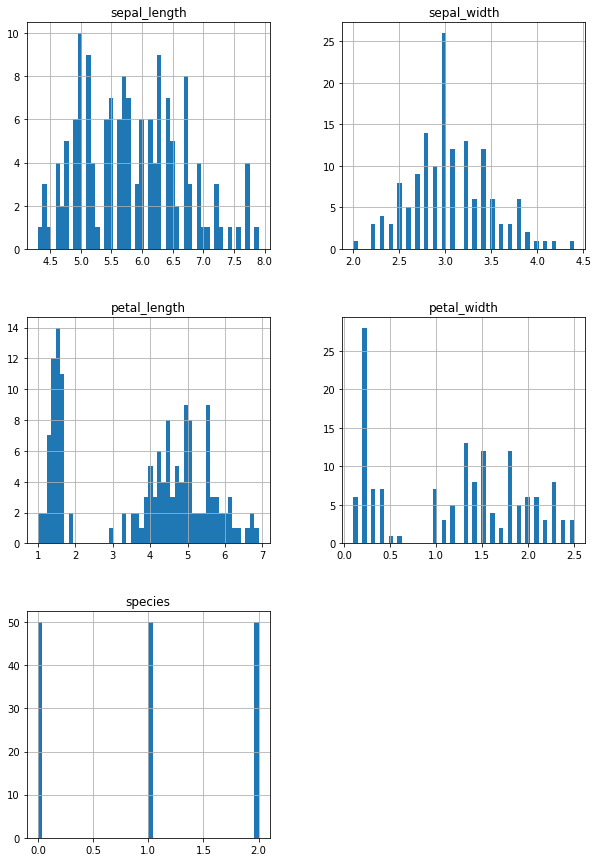

In [63]:
u.df.hist(bins=50,figsize=(10,15))

Explanatory Data Analysis

<AxesSubplot:>

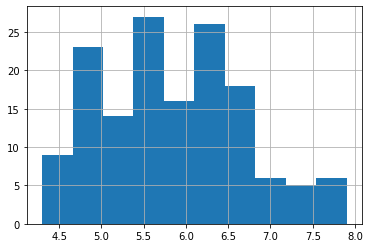

In [64]:
u.df['sepal_length'].hist()

from this gragh we can say it is normal distribution

<AxesSubplot:>

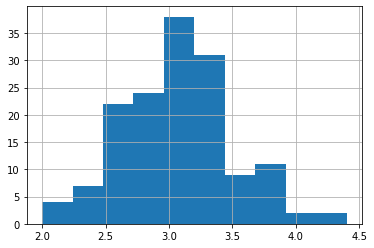

In [65]:
u.df['sepal_width'].hist()

from this gragh we can say it is normal distribution

<AxesSubplot:>

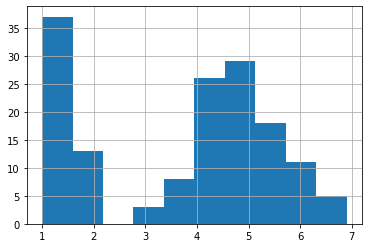

In [66]:
u.df['petal_length'].hist()

From this graph we can gain insight that two classes are together 
and are normally distributed and one class is separated from other two classes

<AxesSubplot:>

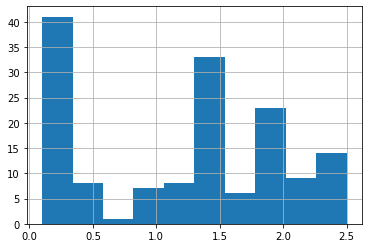

In [67]:
u.df['petal_width'].hist()

From this graph we can gain insight that two classes are together and one class is separated from other two classes

Correlation Matrix


In [68]:
u.df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

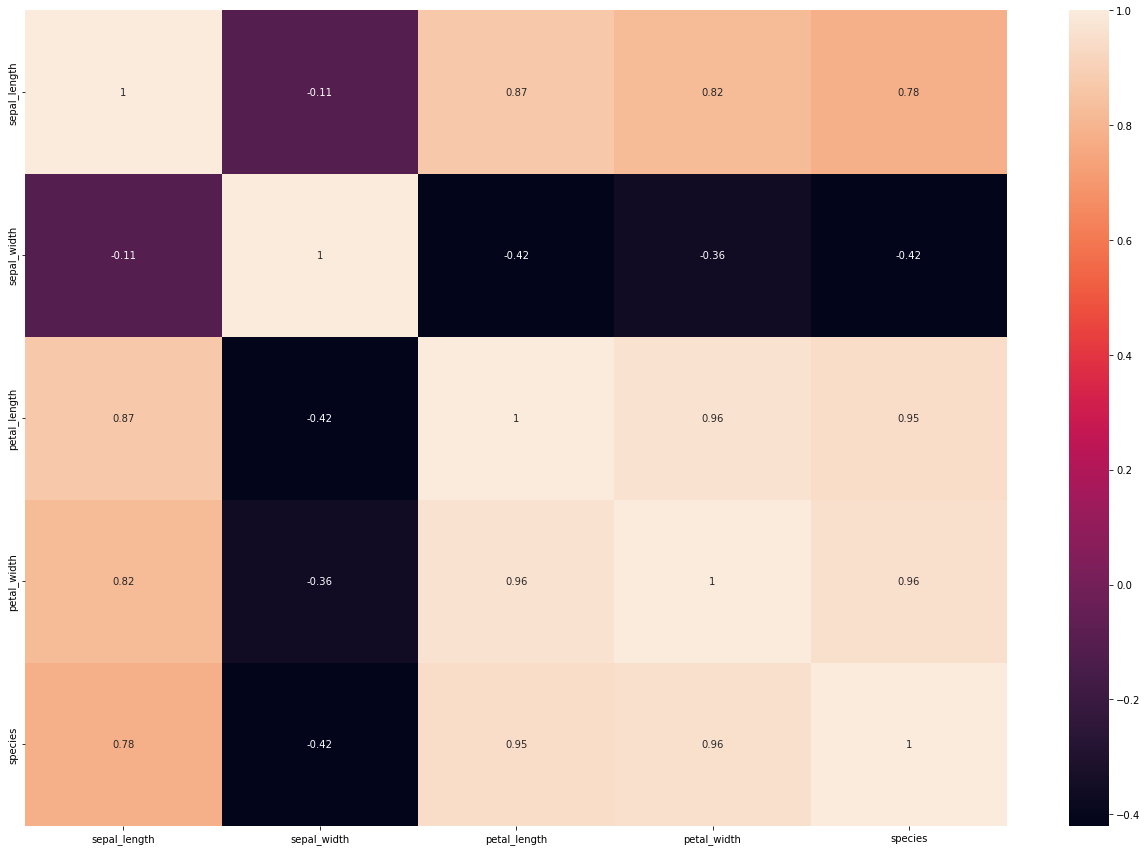

In [69]:
#HeatMap for plotting Correlation
fig,ax = plt.subplots(figsize=(22,15))
sns.heatmap(u.df.corr(),annot=True,ax=ax)

From the above HeatMap we can say that SepalWidth is negatively correlated with SepalLength,PetalLength,PetalWidth
PetalLength is positively correlated with SepalLength,PetalWidth but negatively correlated with SepalWidth
PetalWidth is positively correlated with SepalLength,PetalLength,PetalWidth but negatively correlated with SepalWidth

In [70]:
u.df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='species', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='species', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='species', ylabel='petal_length'>],
   

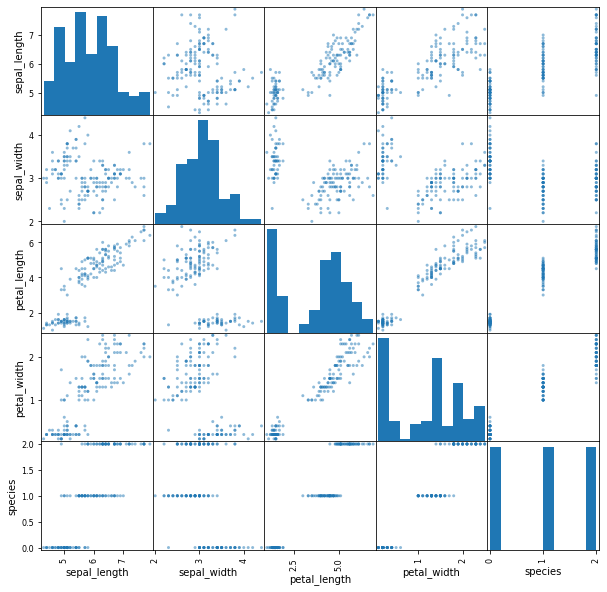

In [71]:
attributes = ['sepal_length','sepal_width','petal_length','petal_width','species']
scatter_matrix(u.df[attributes],figsize=(10,10))

From the above scatter plots we say that SepalWidthCm and SepalLengthCm are strongly correlated

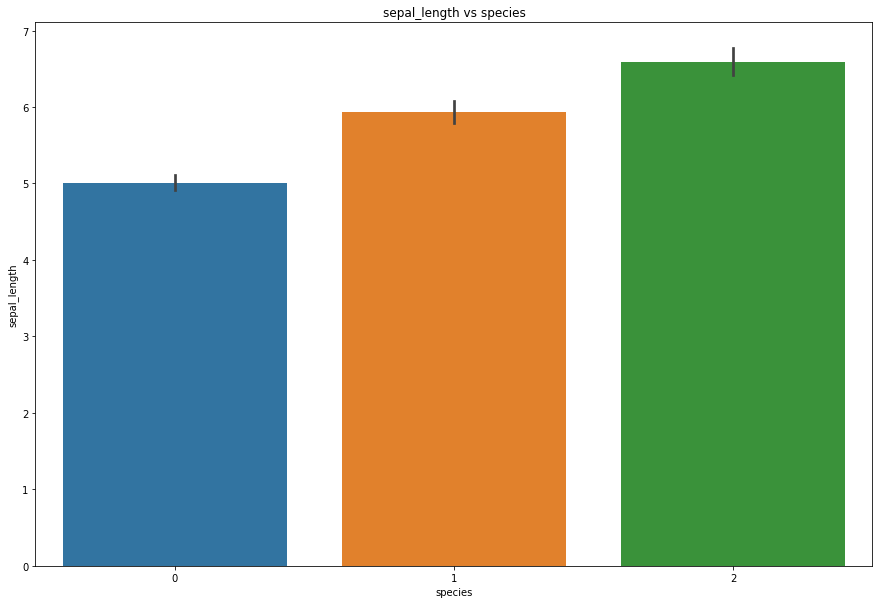

In [72]:
plt.figure(figsize=(15,10))
plt.title('sepal_length vs species')
sns.barplot(x=u.df['species'],y=u.df['sepal_length'])
plt.show()

From this BarPlot we can say that Iris-Virginica has more SepalLength

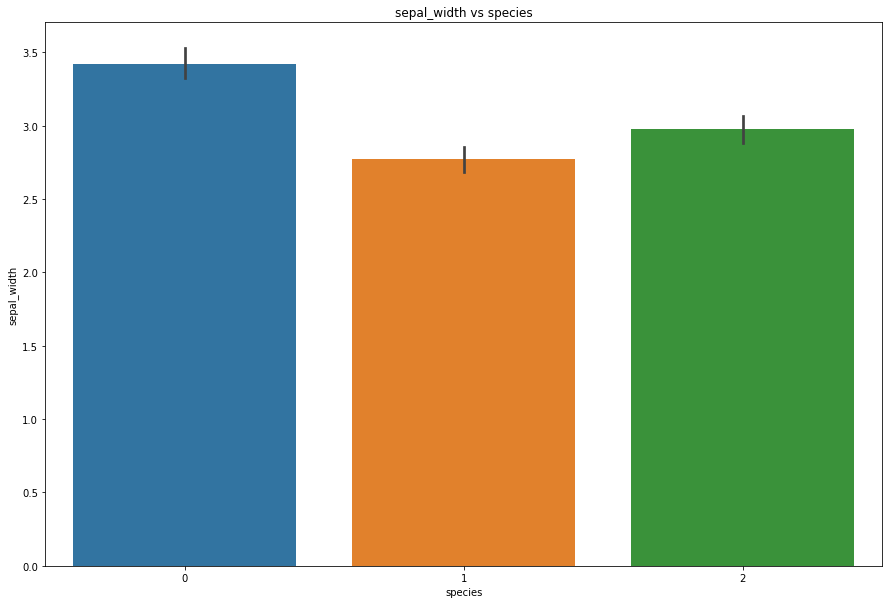

In [73]:
plt.figure(figsize=(15,10))
plt.title('sepal_width vs species')
sns.barplot(x=u.df['species'],y=u.df['sepal_width'])
plt.show()

From this BarPlot we can say that Iris-Setosa has more SepalWidth

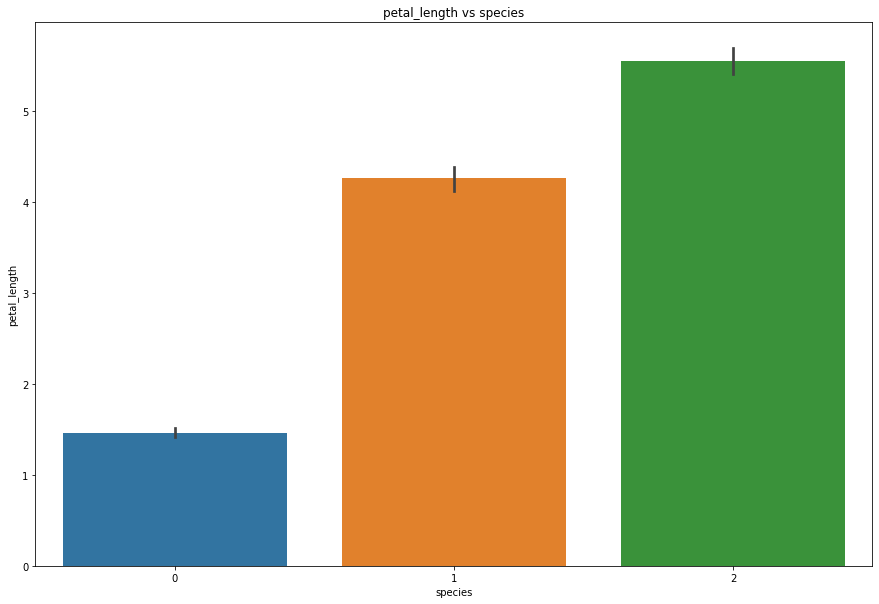

In [74]:
plt.figure(figsize=(15,10))
plt.title('petal_length vs species')
sns.barplot(x=u.df['species'],y=u.df['petal_length'])
plt.show()

From this BarPlot we can say that Iris-Virginica has more PetalLength

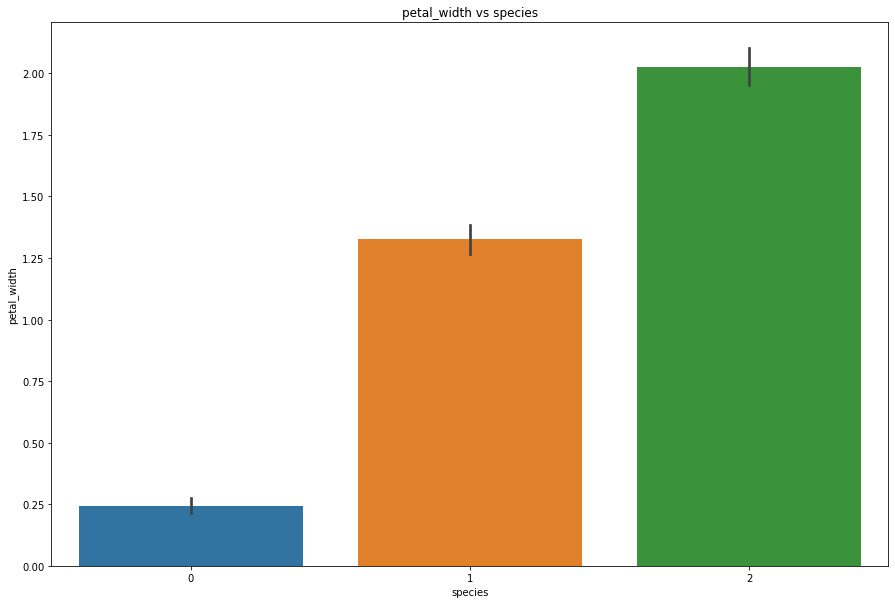

In [75]:
plt.figure(figsize=(15,10))
plt.title('petal_width vs species')
sns.barplot(x=u.df['species'],y=u.df['petal_width'])
plt.show()

From this BarPlot we can say that Iris-Virginica has more PetalWidth

Data Preprocessing

In [76]:
#check for null values
u.df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [33]:
x = u.df.drop(columns=['species'])
y = u.df['species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [78]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [79]:
model.fit(x_train,y_train)

LogisticRegression()

In [80]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777
